<>:166: SyntaxWarning: invalid escape sequence '\T'
<>:202: SyntaxWarning: invalid escape sequence '\m'
<>:203: SyntaxWarning: invalid escape sequence '\o'
<>:166: SyntaxWarning: invalid escape sequence '\T'
<>:202: SyntaxWarning: invalid escape sequence '\m'
<>:203: SyntaxWarning: invalid escape sequence '\o'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_37910/2157533751.py:166: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel('$\Theta$\N{degree sign}')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_37910/2157533751.py:202: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.99,0.95,'$F_{\mathrm{DM}} =1$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_37910/2157533751.py:203: SyntaxWarning: invalid escape sequence '\o'
  plt.text(0.99,0.88,'$\overline{\sigma}_{e} = 10^{-36}$',fontsize=32,color='black',horizontalalignment='right',v

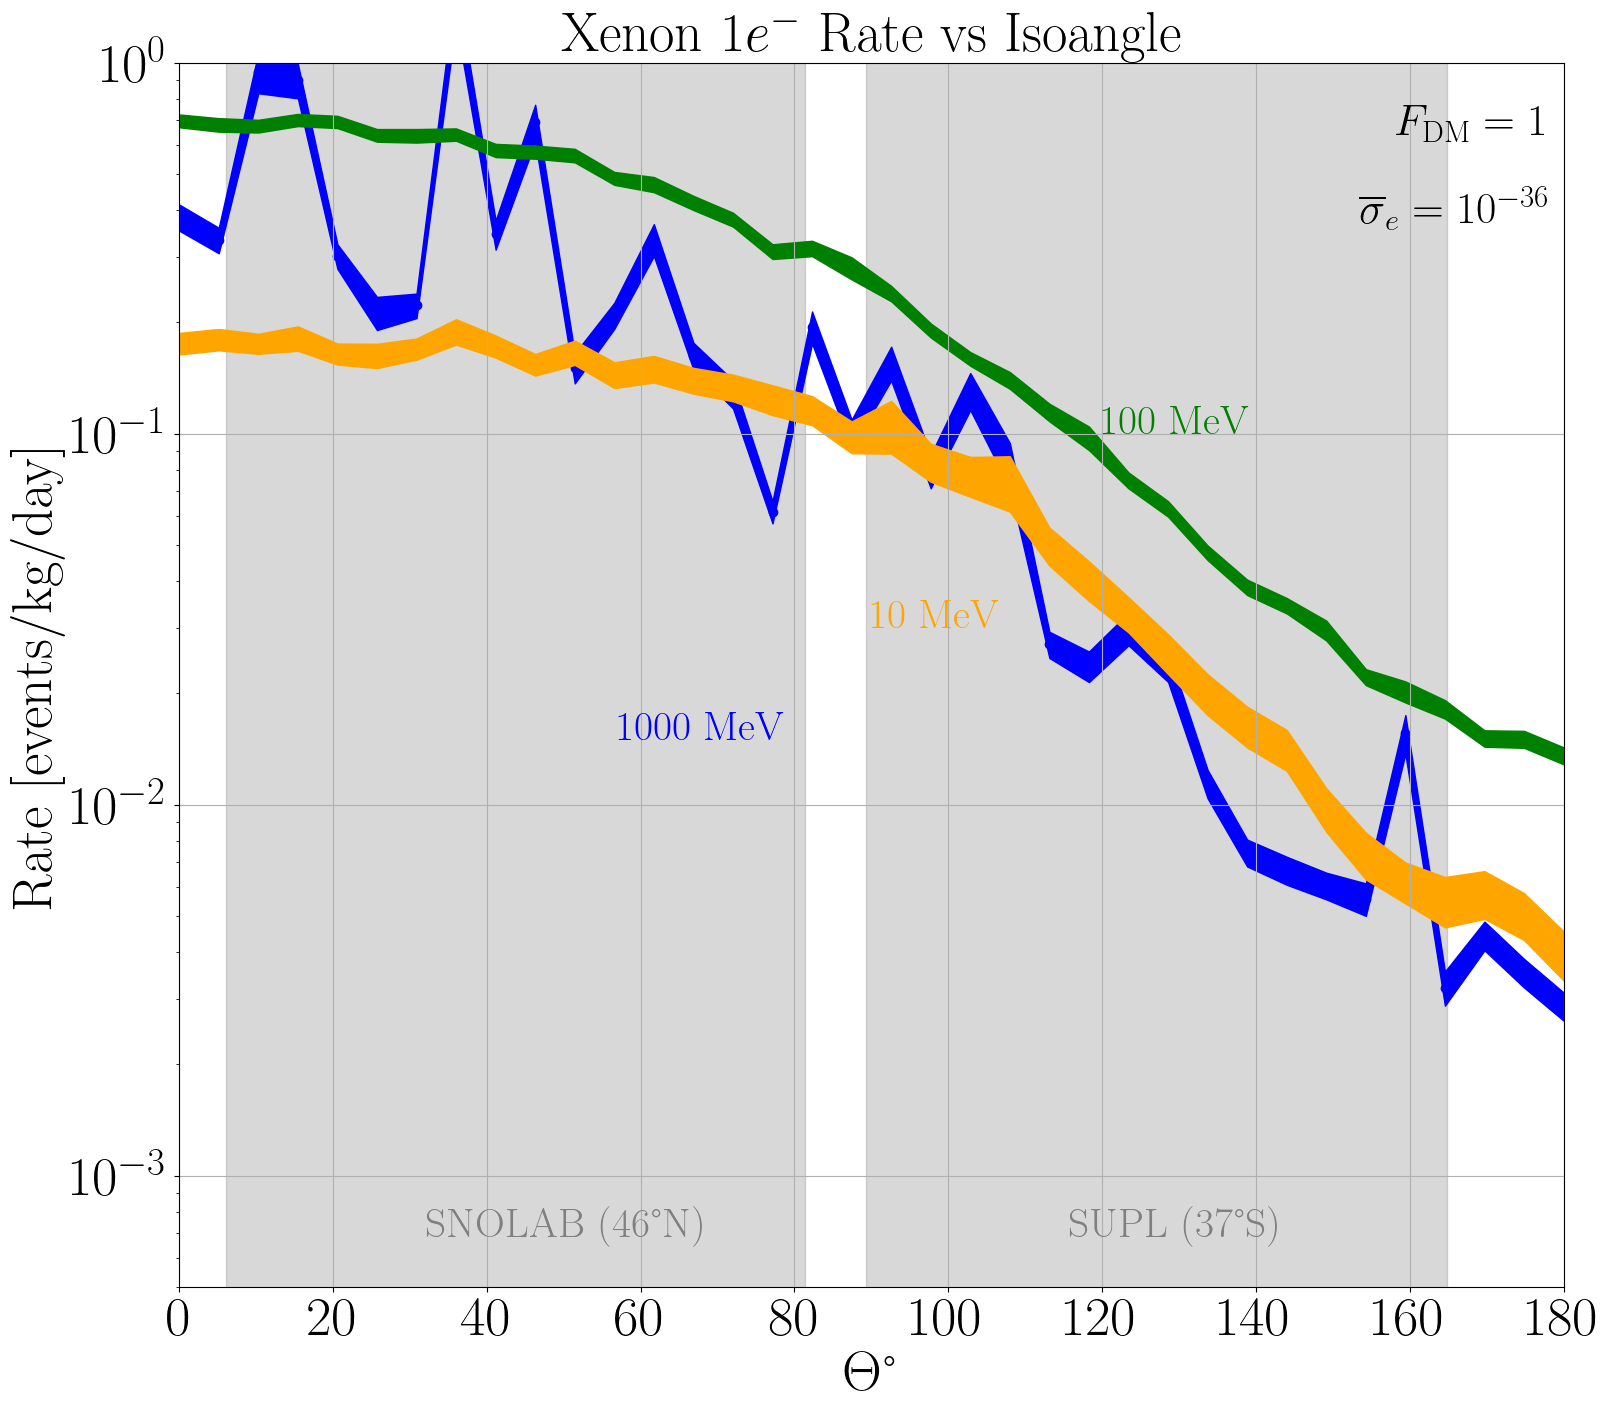

In [1]:
from wimprates_ansh import *
import sys
sys.path.append('../QEDark/')
from QEModulation import fitted_rates
import numpy as np
import matplotlib.pyplot as plt
sigmaE = 1e-36
fdm = 0
mat = "Xe"

plotVerne = False



angles_1GeV,rates_1GeV =  get_modulated_rates(1000,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False)
angles_1GeV,rates_1GeV_high =  get_modulated_rates(1000,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="High")
angles_1GeV,rates_1GeV_low =  get_modulated_rates(1000,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="Low")


angles_100MeV,rates_100MeV =  get_modulated_rates(100,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False)
angles_100MeV,rates_100MeV_high =  get_modulated_rates(100,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="High")
angles_100MeV,rates_100MeV_low =  get_modulated_rates(100,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="Low")


angles_10MeV,rates_10MeV =  get_modulated_rates(10,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False)
angles_10MeV,rates_10MeV_high =  get_modulated_rates(10,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="High")
angles_10MeV,rates_10MeV_low =  get_modulated_rates(10,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="Low")


angles_v,rates_1000MeV_verne =  get_modulated_rates(1000,sigmaE,fdm,useVerne =True,mat=mat,ne=1,integrate=False)
angles_v,rates_100MeV_verne =  get_modulated_rates(100,sigmaE,fdm,useVerne =True,mat=mat,ne=1,integrate=False)
angles_v,rates_10MeV_verne =  get_modulated_rates(10,sigmaE,fdm,useVerne =True,mat=mat,ne=1,integrate=False)




rates_1GeV /=365 #rates /kg/day
rates_1GeV_high /=365
rates_1GeV_low /=365

rates_100MeV /=365 #rates /kg/day
rates_100MeV_high/=365
rates_100MeV_low/=365

rates_10MeV /=365 #rates /kg/day
rates_10MeV_high/=365
rates_10MeV_low/=365


rates_1000MeV_verne/=365 #rates /kg/day
rates_100MeV_verne/=365
rates_10MeV_verne/=365


rates_1000MeV_err = rates_1GeV_high - rates_1GeV
fangles_1000MeV,fit_vector1000MeV,parameters100MeV,errors1000MeV = fitted_rates(angles_1GeV,rates_1GeV,rates_1000MeV_err)

rates_100MeV_err = rates_100MeV_high - rates_100MeV
fangles_100MeV,fit_vector100MeV,parameters100eV,errors100MeV = fitted_rates(angles_100MeV,rates_100MeV,rates_100MeV_err)

rates_10MeV_err = rates_10MeV_high - rates_10MeV
fangles_10MeV,fit_vector10MeV,parameters1MeV,errors10MeV= fitted_rates(angles_10MeV,rates_10MeV,rates_10MeV_err)






# plotting specifications
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.offsetbox import AnchoredText
#Options
params = {'text.usetex' : True,
          'font.size' : 40,
          'font.family' : 'cmr10',
         'figure.autolayout': True
          }
plt.rcParams.update(params)
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=40
plt.rcParams['figure.figsize']=(16,14)

import matplotlib.cm as mplcm
import matplotlib.colors as colors

cmap = plt.get_cmap("tab10") # default color cycle, call by using color=cmap(i) i=0 is blue
#reversed('RdBu')



golden = (1 + 5 ** 0.5) / 2
goldenx = 15
goldeny = goldenx / golden
plt.figure(layout='constrained')

colors = ['green','blue','orange','red']



# Snolab Minimum and Maximum Isoangles
# 6.039066639146133 81.33821611144151
# Bariloche Minimum and Maximum Angles
# 93.27445445862013 168.83822629319823
# SUPL Minimum and Maximum Angles
# 89.26129275462549 164.8486791095454

southx = np.linspace(89.26129275462549,164.8486791095454,50)
southy1 = np.ones_like(southx)*1e14
southy2 = np.zeros_like(southx)
northx = np.linspace(6.039066639146133,81.33821611144151,50)
northy1 = np.ones_like(northx)*1e14
northy2 = np.zeros_like(northx)



plt.fill_between(southx,southy1,southy2,color='grey',alpha=0.3)

plt.fill_between(northx,northy1,northy2,color='grey',alpha=0.3)

plt.fill_between(angles_1GeV,rates_1GeV_low,rates_1GeV_high,color=colors[1])
plt.scatter(angles_1GeV,rates_1GeV,label=f'1000 MeV',color=colors[1])
# plt.plot(angles_1000MeV,fit_1000MeV,color=colors[1])

plt.fill_between(angles_100MeV,rates_100MeV_low,rates_100MeV_high,color=colors[0])
plt.scatter(angles_100MeV,rates_100MeV,label=f'100 MeV',color=colors[0])

# plt.plot(angles_100MeV,fit_100MeV,color=colors[0])

plt.fill_between(angles_10MeV,rates_10MeV_low,rates_10MeV_high,color=colors[2])
plt.scatter(angles_10MeV,rates_10MeV,label=f'10 MeV',color=colors[2])

# plt.plot(angles_10MeV,fit_10MeV,color=colors[2])

if plotVerne:
    plt.plot(angles_v,rates_1000MeV_verne,color=colors[1],ls='--')
    plt.plot(angles_v,rates_10MeV_verne,color=colors[2],ls='--')
    plt.plot(angles_v,rates_100MeV_verne,color=colors[0],ls='--')





# paperx1000,papery1000 = format_digitize('1000_heavy.csv')
# paperx1000 = np.linspace(0,180,len(papery1000))
# ax.plot(paperx1000,papery1000,label=f'1000 MeV Timon',color=colors[1],ls='--')



# paperx100,papery100 = format_digitize('100_heavy.csv')
# paperx100 = np.linspace(0,180,len(papery100))
# ax.plot(paperx100,papery100,label=f'100 MeV Timon',color=colors[0],ls='--')


# paperx10,papery10 = format_digitize('10_heavy.csv')
# paperx10 = np.linspace(0,180,len(papery10))
# ax.plot(paperx10,papery10,label=f'10 MeV Timon',color=colors[2],ls='--')



    # ax.fill_between(isoangles,QEDark_Spectra_1e33_heavy_high[mX],QEDark_Spectra_1e33_heavy_low[mX],color=colors[i])

plt.xlabel('$\Theta$\N{degree sign}')
plt.ylabel('Rate [events/kg/day]')
plt.yscale('log')
plt.grid()
plt.title('Xenon $1e^-$ Rate vs Isoangle',fontsize=40)
plt.ylim(5e-4,1)
plt.xlim(0,180)













# ls = ['-','--']
# dummy_lines = []
# for b_idx in [0,1]:
#     dummy_lines.append(ax.plot([],[], c="black", ls = ls[b_idx])[0])
# legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["DaMaSCUS", "Verne"], loc=2)
# ax.add_artist(legend2)

plt.annotate('$1000$ MeV',(57,1.5e-2),color=colors[1],fontsize=30)
plt.annotate('$100$ MeV',(120,1e-1),color=colors[0],fontsize=30)
plt.annotate('$10$ MeV',(90,3e-2),color=colors[2],fontsize=30)
# plt.legend(loc='upper left')
# plt.tight_layout()
ax = plt.gca()
plt.text(0.28,0.05,'SNOLAB ($46$\N{degree sign}N)',fontsize=30,color='grey',horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
plt.text(0.72,0.05,'SUPL ($37$\N{degree sign}S)',fontsize=30,color='grey',horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)

plt.text(0.99,0.95,'$F_{\mathrm{DM}} =1$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)
plt.text(0.99,0.88,'$\overline{\sigma}_{e} = 10^{-36}$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)

plt.xticks(np.linspace(0,180,19)[::2])


if plotVerne:
    ls = ['-','--']
    dummy_lines = []
    for b_idx in [0,1]:
        dummy_lines.append(ax.plot([],[], c="black", ls = ls[b_idx])[0])
    legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["DaMaSCUS", "Verne"], loc='lower left',prop={'size': 30})
    ax.add_artist(legend2)


plt.savefig(f'../../../../ModulationFigs/Xe/Xe_Rates_Comparison_FDM{fdm}_sigmaE_{sigmaE}.pdf')




plt.show()


plt.close()


<>:166: SyntaxWarning: invalid escape sequence '\T'
<>:202: SyntaxWarning: invalid escape sequence '\m'
<>:203: SyntaxWarning: invalid escape sequence '\o'
<>:166: SyntaxWarning: invalid escape sequence '\T'
<>:202: SyntaxWarning: invalid escape sequence '\m'
<>:203: SyntaxWarning: invalid escape sequence '\o'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_37910/2808459224.py:166: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel('$\Theta$\N{degree sign}')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_37910/2808459224.py:202: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.99,0.95,'$F_{\mathrm{DM}} =1$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_37910/2808459224.py:203: SyntaxWarning: invalid escape sequence '\o'
  plt.text(0.99,0.88,'$\overline{\sigma}_{e} = 10^{-36}$',fontsize=32,color='black',horizontalalignment='right',v

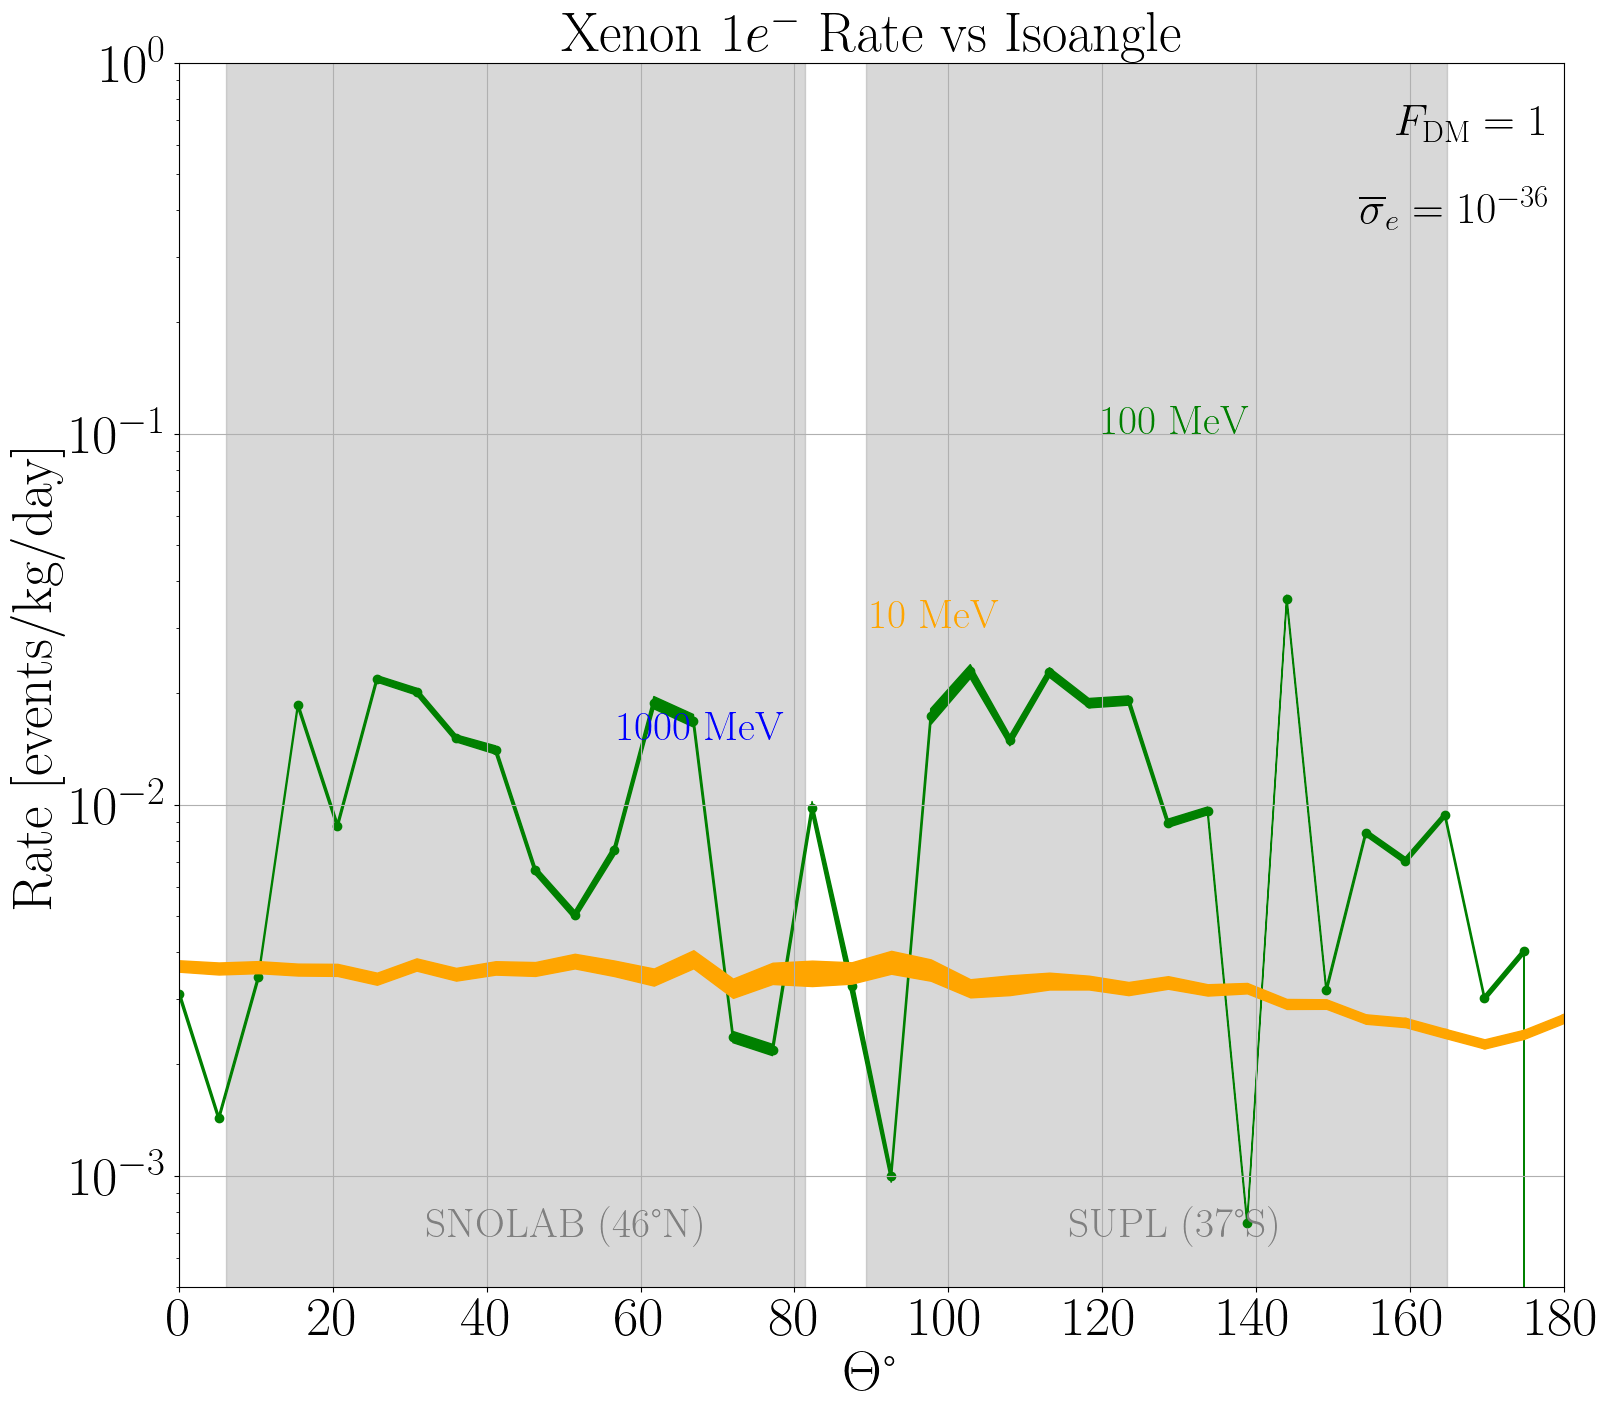

In [2]:
from wimprates_ansh import *
import sys
sys.path.append('../QEDark/')
from QEModulation import fitted_rates
import numpy as np
import matplotlib.pyplot as plt
sigmaE = 1e-34
fdm = 2
mat = "Xe"

plotVerne = False



angles_1GeV,rates_1GeV =  get_modulated_rates(1000,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False)
angles_1GeV,rates_1GeV_high =  get_modulated_rates(1000,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="High")
angles_1GeV,rates_1GeV_low =  get_modulated_rates(1000,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="Low")


angles_100MeV,rates_100MeV =  get_modulated_rates(100,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False)
angles_100MeV,rates_100MeV_high =  get_modulated_rates(100,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="High")
angles_100MeV,rates_100MeV_low =  get_modulated_rates(100,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="Low")


angles_10MeV,rates_10MeV =  get_modulated_rates(10,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False)
angles_10MeV,rates_10MeV_high =  get_modulated_rates(10,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="High")
angles_10MeV,rates_10MeV_low =  get_modulated_rates(10,sigmaE,fdm,useVerne =False,mat=mat,ne=1,integrate=False,calcErrors="Low")


angles_v,rates_1000MeV_verne =  get_modulated_rates(1000,sigmaE,fdm,useVerne =True,mat=mat,ne=1,integrate=False)
angles_v,rates_100MeV_verne =  get_modulated_rates(100,sigmaE,fdm,useVerne =True,mat=mat,ne=1,integrate=False)
angles_v,rates_10MeV_verne =  get_modulated_rates(10,sigmaE,fdm,useVerne =True,mat=mat,ne=1,integrate=False)




rates_1GeV /=365 #rates /kg/day
rates_1GeV_high /=365
rates_1GeV_low /=365

rates_100MeV /=365 #rates /kg/day
rates_100MeV_high/=365
rates_100MeV_low/=365

rates_10MeV /=365 #rates /kg/day
rates_10MeV_high/=365
rates_10MeV_low/=365


rates_1000MeV_verne/=365 #rates /kg/day
rates_100MeV_verne/=365
rates_10MeV_verne/=365


rates_1000MeV_err = rates_1GeV_high - rates_1GeV
fangles_1000MeV,fit_vector1000MeV,parameters100MeV,errors1000MeV = fitted_rates(angles_1GeV,rates_1GeV,rates_1000MeV_err)

rates_100MeV_err = rates_100MeV_high - rates_100MeV
fangles_100MeV,fit_vector100MeV,parameters100eV,errors100MeV = fitted_rates(angles_100MeV,rates_100MeV,rates_100MeV_err)

rates_10MeV_err = rates_10MeV_high - rates_10MeV
fangles_10MeV,fit_vector10MeV,parameters1MeV,errors10MeV= fitted_rates(angles_10MeV,rates_10MeV,rates_10MeV_err)






# plotting specifications
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.offsetbox import AnchoredText
#Options
params = {'text.usetex' : True,
          'font.size' : 40,
          'font.family' : 'cmr10',
         'figure.autolayout': True
          }
plt.rcParams.update(params)
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=40
plt.rcParams['figure.figsize']=(16,14)

import matplotlib.cm as mplcm
import matplotlib.colors as colors

cmap = plt.get_cmap("tab10") # default color cycle, call by using color=cmap(i) i=0 is blue
#reversed('RdBu')



golden = (1 + 5 ** 0.5) / 2
goldenx = 15
goldeny = goldenx / golden
plt.figure(layout='constrained')

colors = ['green','blue','orange','red']



# Snolab Minimum and Maximum Isoangles
# 6.039066639146133 81.33821611144151
# Bariloche Minimum and Maximum Angles
# 93.27445445862013 168.83822629319823
# SUPL Minimum and Maximum Angles
# 89.26129275462549 164.8486791095454

southx = np.linspace(89.26129275462549,164.8486791095454,50)
southy1 = np.ones_like(southx)*1e14
southy2 = np.zeros_like(southx)
northx = np.linspace(6.039066639146133,81.33821611144151,50)
northy1 = np.ones_like(northx)*1e14
northy2 = np.zeros_like(northx)



plt.fill_between(southx,southy1,southy2,color='grey',alpha=0.3)

plt.fill_between(northx,northy1,northy2,color='grey',alpha=0.3)

plt.fill_between(angles_1GeV,rates_1GeV_low,rates_1GeV_high,color=colors[1])
plt.scatter(angles_1GeV,rates_1GeV,label=f'1000 MeV',color=colors[1])
# plt.plot(angles_1000MeV,fit_1000MeV,color=colors[1])

plt.fill_between(angles_100MeV,rates_100MeV_low,rates_100MeV_high,color=colors[0])
plt.scatter(angles_100MeV,rates_100MeV,label=f'100 MeV',color=colors[0])

# plt.plot(angles_100MeV,fit_100MeV,color=colors[0])

plt.fill_between(angles_10MeV,rates_10MeV_low,rates_10MeV_high,color=colors[2])
plt.scatter(angles_10MeV,rates_10MeV,label=f'10 MeV',color=colors[2])

# plt.plot(angles_10MeV,fit_10MeV,color=colors[2])

if plotVerne:
    plt.plot(angles_v,rates_1000MeV_verne,color=colors[1],ls='--')
    plt.plot(angles_v,rates_10MeV_verne,color=colors[2],ls='--')
    plt.plot(angles_v,rates_100MeV_verne,color=colors[0],ls='--')





# paperx1000,papery1000 = format_digitize('1000_heavy.csv')
# paperx1000 = np.linspace(0,180,len(papery1000))
# ax.plot(paperx1000,papery1000,label=f'1000 MeV Timon',color=colors[1],ls='--')



# paperx100,papery100 = format_digitize('100_heavy.csv')
# paperx100 = np.linspace(0,180,len(papery100))
# ax.plot(paperx100,papery100,label=f'100 MeV Timon',color=colors[0],ls='--')


# paperx10,papery10 = format_digitize('10_heavy.csv')
# paperx10 = np.linspace(0,180,len(papery10))
# ax.plot(paperx10,papery10,label=f'10 MeV Timon',color=colors[2],ls='--')



    # ax.fill_between(isoangles,QEDark_Spectra_1e33_heavy_high[mX],QEDark_Spectra_1e33_heavy_low[mX],color=colors[i])

plt.xlabel('$\Theta$\N{degree sign}')
plt.ylabel('Rate [events/kg/day]')
plt.yscale('log')
plt.grid()
plt.title('Xenon $1e^-$ Rate vs Isoangle',fontsize=40)
plt.ylim(5e-4,1)
plt.xlim(0,180)













# ls = ['-','--']
# dummy_lines = []
# for b_idx in [0,1]:
#     dummy_lines.append(ax.plot([],[], c="black", ls = ls[b_idx])[0])
# legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["DaMaSCUS", "Verne"], loc=2)
# ax.add_artist(legend2)

plt.annotate('$1000$ MeV',(57,1.5e-2),color=colors[1],fontsize=30)
plt.annotate('$100$ MeV',(120,1e-1),color=colors[0],fontsize=30)
plt.annotate('$10$ MeV',(90,3e-2),color=colors[2],fontsize=30)
# plt.legend(loc='upper left')
# plt.tight_layout()
ax = plt.gca()
plt.text(0.28,0.05,'SNOLAB ($46$\N{degree sign}N)',fontsize=30,color='grey',horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
plt.text(0.72,0.05,'SUPL ($37$\N{degree sign}S)',fontsize=30,color='grey',horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)

plt.text(0.99,0.95,'$F_{\mathrm{DM}} =1$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)
plt.text(0.99,0.88,'$\overline{\sigma}_{e} = 10^{-36}$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)

plt.xticks(np.linspace(0,180,19)[::2])


if plotVerne:
    ls = ['-','--']
    dummy_lines = []
    for b_idx in [0,1]:
        dummy_lines.append(ax.plot([],[], c="black", ls = ls[b_idx])[0])
    legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["DaMaSCUS", "Verne"], loc='lower left',prop={'size': 30})
    ax.add_artist(legend2)


plt.savefig(f'../../../../ModulationFigs/Xe/Xe_Rates_Comparison_FDM{fdm}_sigmaE_{sigmaE}.pdf')




plt.show()


plt.close()
